In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df_DA=pd.read_csv("gsearch_jobs.csv",index_col=0)

## Data Cleaning

In [4]:
df_DA.drop(columns=['index','commute_time','salary','extensions','posted_at'],axis=1,inplace=True)
df_DA.sort_values(by='date_time',inplace=True)
df_DA['date_time']=pd.to_datetime(df_DA['date_time'])
df_DA['description_tokens']=df_DA['description_tokens'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills )
df_DA.reset_index(drop=True, inplace=True)

In [5]:
df_DA = df_DA.rename(columns={'title' : 'job_title',
                      'description' : 'job_description',
                      'search_term' : 'job_Title_short',
                      'search_location' : 'country',
                      'description_tokens' : 'job_skills'
                      })

## Optimal Skills

In [6]:
df_DA = df_DA.dropna(subset=['salary_standardized'])

In [7]:
# Explode job_skills so that each skill appears in a separate row (one-to-many)
df_DA_exploded = df_DA.explode('job_skills')

In [8]:
df_DA_2023 = df_DA_exploded[df_DA_exploded['date_time'].dt.year == 2023]
df_DA_2024 = df_DA_exploded[df_DA_exploded['date_time'].dt.year == 2024]

In [9]:
# Group by job_skills → calculate median salary & count
# Sort by count (demand)
top_skills_2023 = df_DA_2023.groupby('job_skills')['salary_standardized'].agg(['median','count']).sort_values(by='count',ascending=False).head(10)
top_skills_2024 = df_DA_2024.groupby('job_skills')['salary_standardized'].agg(['median','count']).sort_values(by='count',ascending=False).head(10)

In [10]:
# Rename columns
top_skills_2023 = top_skills_2023.rename(columns = {'count' : 'skill count' , 'median' : 'median salary'})
top_skills_2024 = top_skills_2024.rename(columns = {'count' : 'skill count' , 'median' : 'median salary'})

In [11]:
print(top_skills_2023)
print(top_skills_2024)

               median salary  skill count
job_skills                               
sql                  96500.0         2299
excel                78000.0         1565
tableau              96500.0         1378
python               98800.0         1093
power_bi             86747.5         1026
r                    90000.0          643
microstrategy        96500.0          402
powerpoint           92500.0          342
jira                 96500.0          323
sas                  85000.0          317
            median salary  skill count
job_skills                            
sql              100000.0         1316
python           100000.0          914
excel             75000.0          837
power_bi          93500.0          833
tableau          100000.0          730
r                100000.0          552
aws              102500.0          198
word              65520.0          195
azure            108160.0          184
sas              100000.0          183


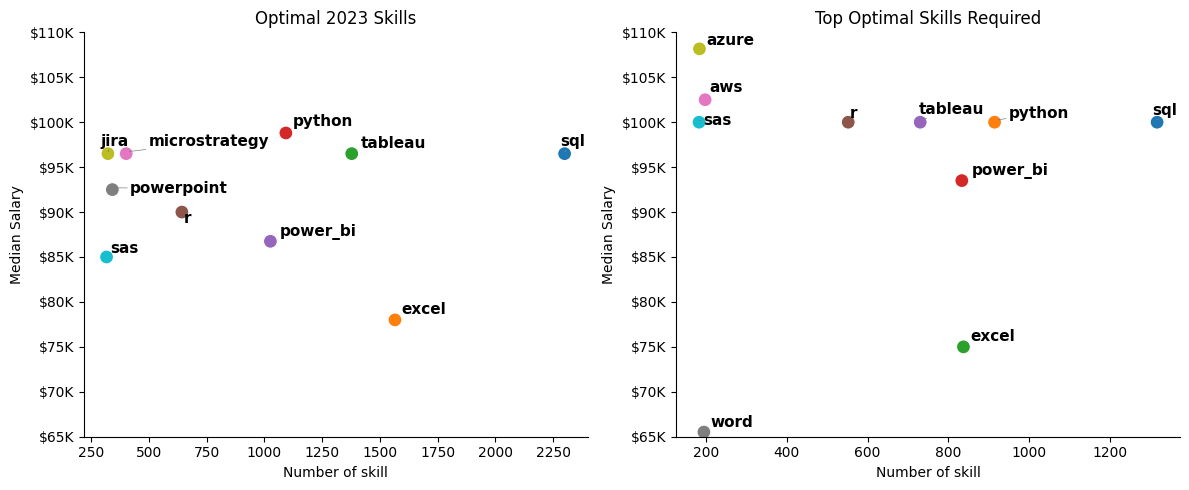

In [12]:
# Select data
df_years=[top_skills_2023 , top_skills_2024]

# Set titles
titles=['Optimal 2023 Skills' , 'Optimal 2024 Skills']

fig , ax =plt.subplots(1,2,figsize=(12,5))
 

for i , df_year in enumerate(df_years):
    sns.scatterplot(data = df_years[i] , x="skill count", y="median salary" , hue=df_year.index , palette="tab10", s=100 , ax=ax[i])
    sns.despine(ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("Number of skill")
    ax[i].set_ylabel("Median Salary")
    ax[i].legend().remove()
    ax[i].set_ylim(65000,110000)
    ax[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

    texts=[]
    for skill, row in df_year.iterrows():
        texts.append(ax[i].text(
            row["skill count"]+0.2,  
            row["median salary"]+200, 
            skill, 
            fontsize=11,
            fontweight='bold'
        ))



    adjust_text(texts, ax=ax[i], arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

plt.title("Top Optimal Skills Required")
plt.tight_layout()
plt.show()


